# Romer and Romer (2004) Identification Strategy

$$
\begin{align}
    \Delta ff_m &= \alpha + \beta ffb + \sum_{i=-1}^2 \gamma_i F_m \Delta y_{m,i} + \sum_{i=-1}^2 \lambda_i (F_m \Delta y_{m,i} - F_{m-1} \Delta y_{m,i}) \nonumber \\
    &+ \sum_{i=-1}^2 \varphi_i F_m \pi_{m,i}+ \sum_{i=-1}^2 \theta_i (F_m \pi_{m,i} - F_{m-1} \pi_{m,i}) + \mu_i F_m     ue_0 + \varepsilon_m,
    \end{align}
$$

In [1]:
import pandas as pd

## Import Data

1. Download the Greenbook Forecasts from the FRB of Philadelphia [here](https://www.philadelphiafed.org/surveys-and-data/real-time-data-research/philadelphia-data-set)
2. Load Real GDP growth (gRGDP), CPI growth (gPCPI) and Unemployment rate (UNEMP)

In [2]:
RGDP_data = pd.read_excel('data/GBweb_Row_Format.xlsx', sheet_name='gRGDP')
CPI_data = pd.read_excel('data/GBweb_Row_Format.xlsx', sheet_name='gPCPI')
UNEMP_data = pd.read_excel('data/GBweb_Row_Format.xlsx', sheet_name='UNEMP')


Quickly take a look at the data.

In [3]:
RGDP_data.head(5)

,DATE,gRGDPB4,gRGDPB3,gRGDPB2,gRGDPB1,gRGDPF0,gRGDPF1,gRGDPF2,gRGDPF3,gRGDPF4,gRGDPF5,gRGDPF6,gRGDPF7,gRGDPF8,gRGDPF9,GBdate
0,1967.1,5.9,1.9,4.0,4.5,0.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670329
1,1967.2,1.9,4.0,4.5,0.0,1.6,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670426
2,1967.2,1.9,4.0,4.5,-0.3,1.4,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670517
3,1967.2,1.9,4.0,4.5,-0.3,2.3,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670614
4,1967.3,3.4,3.8,-0.2,2.4,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670717


In [4]:
CPI_data.head(5)

,DATE,gPCPIB4,gPCPIB3,gPCPIB2,gPCPIB1,gPCPIF0,gPCPIF1,gPCPIF2,gPCPIF3,gPCPIF4,gPCPIF5,gPCPIF6,gPCPIF7,gPCPIF8,gPCPIF9,GBdate
0,1967.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670329
1,1967.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670426
2,1967.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670517
3,1967.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670614
4,1967.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670717


In [5]:
UNEMP_data.head(5)

,DATE,UNEMPB4,UNEMPB3,UNEMPB2,UNEMPB1,UNEMPF0,UNEMPF1,UNEMPF2,UNEMPF3,UNEMPF4,UNEMPF5,UNEMPF6,UNEMPF7,UNEMPF8,UNEMPF9,GBdate
0,1967.1,3.8,3.8,3.8,3.7,3.8,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670329
1,1967.2,3.8,3.8,3.7,3.7,4.0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670426
2,1967.2,3.8,3.8,3.7,3.7,3.9,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670517
3,1967.2,3.8,3.8,3.7,3.7,3.9,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670614
4,1967.3,3.8,3.7,3.7,3.8,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19670717


For GDP and Inflation we are interested in the columns that end with:
 - F0, this corresponds to the Greenbook forecast done for the current meeting $m$.
 - B1, this is the previous quarter forecast.
 - F1 and F2, correspond to the forecast one and two quarters ahead.

In [6]:
RGDP = RGDP_data[['GBdate', 'gRGDPB1','gRGDPF0','gRGDPF1','gRGDPF2']]
CPI = CPI_data[['GBdate', 'gPCPIB1','gPCPIF0','gPCPIF1','gPCPIF2']]
UNEMP = UNEMP_data[['GBdate', 'UNEMPF0']]

RGDP.head(5)
# CPI.head(5)
# UNEMP.head(5)

,GBdate,gRGDPB1,gRGDPF0,gRGDPF1,gRGDPF2
0,19670329,4.5,0.5,1.0,NaN
1,19670426,0.0,1.6,4.1,NaN
2,19670517,-0.3,1.4,4.7,NaN
3,19670614,-0.3,2.3,4.5,NaN
4,19670717,2.4,4.3,NaN,NaN


We also kept the date of the meeting. However, we need to change its format

In [7]:
RGDP['GBdate'] = pd.to_datetime(RGDP['GBdate'], format='%Y%m%d')
CPI['GBdate'] = pd.to_datetime(CPI['GBdate'], format='%Y%m%d')
UNEMP['GBdate'] = pd.to_datetime(UNEMP['GBdate'], format='%Y%m%d')

RGDP.head(5)
# CPI.head(5)
# UNEMP.head(5)

/var/folders/yp/830clknj34z106g8m0dfpq9r0000gn/T/ipykernel_89973/3495130474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RGDP['GBdate'] = pd.to_datetime(RGDP['GBdate'], format='%Y%m%d')
/var/folders/yp/830clknj34z106g8m0dfpq9r0000gn/T/ipykernel_89973/3495130474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPI['GBdate'] = pd.to_datetime(CPI['GBdate'], format='%Y%m%d')
/var/folders/yp/830clknj34z106g8m0dfpq9r0000gn/T/ipykernel_89973/3495130474.py:3: SettingWithCopyWarning: 
A value is trying to 

,GBdate,gRGDPB1,gRGDPF0,gRGDPF1,gRGDPF2
0,1967-03-29,4.5,0.5,1.0,NaN
1,1967-04-26,0.0,1.6,4.1,NaN
2,1967-05-17,-0.3,1.4,4.7,NaN
3,1967-06-14,-0.3,2.3,4.5,NaN
4,1967-07-17,2.4,4.3,NaN,NaN


Now we can merge all the dataframes to have all the relevant Greenbook data together.

In [8]:
GB_data = pd.merge(RGDP, CPI, how='outer', on='GBdate')
GB_data = pd.merge(GB_data, UNEMP, how='outer', on='GBdate')

GB_data.head(5)

,GBdate,gRGDPB1,gRGDPF0,gRGDPF1,gRGDPF2,gPCPIB1,gPCPIF0,gPCPIF1,gPCPIF2,UNEMPF0
0,1967-03-29,4.5,0.5,1.0,NaN,NaN,NaN,NaN,NaN,3.8
1,1967-04-26,0.0,1.6,4.1,NaN,NaN,NaN,NaN,NaN,4.0
2,1967-05-17,-0.3,1.4,4.7,NaN,NaN,NaN,NaN,NaN,3.9
3,1967-06-14,-0.3,2.3,4.5,NaN,NaN,NaN,NaN,NaN,3.9
4,1967-07-17,2.4,4.3,NaN,NaN,NaN,NaN,NaN,NaN,3.9


Addtionally, we need to create new columns that contain the change in the forecast for:
 - RGDP growth
 - CPI growth

This means an additional column per each existing column beyond GBdate.

For that, first let us go back to the original data sets, RGDP_data and CPI_data.

Now we have to consider that the previous forecast for meeting $m$ are F0 (for B1), F1 (for F0), F2 (for F1) and F3 (for F2).

Hence, we need to extract those columns.

In [9]:
RGDP_prevF = RGDP_data[['GBdate', 'gRGDPF0','gRGDPF1','gRGDPF2','gRGDPF3']]
CPI_prevF = CPI_data[['GBdate', 'gPCPIF0','gPCPIF1','gPCPIF2','gPCPIF3']]
# UNEMP_prevF = UNEMP_data[['GBdate', 'UNEMPF0','UNEMPF1','UNEMPF2','UNEMPF3']]

# Also, take the lag of the data
RGDP_prevF = RGDP_prevF.shift(1)
CPI_prevF = CPI_prevF.shift(1)
# UNEMP_prevF = UNEMP_prevF.shift(1)

In [10]:
# Columns for RGDP Forecast Change
GB_data['gRGDPB1_change'] = RGDP['gRGDPB1'] - RGDP_prevF['gRGDPF0']
GB_data['gRGDPF0_change'] = RGDP['gRGDPF0'] - RGDP_prevF['gRGDPF1']
GB_data['gRGDPF1_change'] = RGDP['gRGDPF1'] - RGDP_prevF['gRGDPF2']
GB_data['gRGDPF2_change'] = RGDP['gRGDPF2'] - RGDP_prevF['gRGDPF3']

# Columns for CPI Forecast Change. Do the same for CPI
GB_data['gPCPIB1_change'] = CPI['gPCPIB1'] - CPI_prevF['gPCPIF0']
GB_data['gPCPIF0_change'] = CPI['gPCPIF0'] - CPI_prevF['gPCPIF1']
GB_data['gPCPIF1_change'] = CPI['gPCPIF1'] - CPI_prevF['gPCPIF2']
GB_data['gPCPIF2_change'] = CPI['gPCPIF2'] - CPI_prevF['gPCPIF3']

# # Columns for UNEMP Forecast Change
# GB_data['UNEMPB1_change'] = UNEMP['UNEMPB1'] - UNEMP_prevF['UNEMPF0']
# GB_data['UNEMPF0_change'] = UNEMP['UNEMPF0'] - UNEMP_prevF['UNEMPF1']
# GB_data['UNEMPF1_change'] = UNEMP['UNEMPF1'] - UNEMP_prevF['UNEMPF2']
# GB_data['UNEMPF2_change'] = UNEMP['UNEMPF2'] - UNEMP_prevF['UNEMPF3']

In [11]:
GB_data.head(15)

,GBdate,gRGDPB1,gRGDPF0,gRGDPF1,gRGDPF2,gPCPIB1,gPCPIF0,gPCPIF1,gPCPIF2,UNEMPF0,gRGDPB1_change,gRGDPF0_change,gRGDPF1_change,gRGDPF2_change,gPCPIB1_change,gPCPIF0_change,gPCPIF1_change,gPCPIF2_change
0,1967-03-29,4.5,0.5,1.0,NaN,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1967-04-26,0.0,1.6,4.1,NaN,NaN,NaN,NaN,NaN,4.0,-0.5,0.6,NaN,NaN,NaN,NaN,NaN,NaN
2,1967-05-17,-0.3,1.4,4.7,NaN,NaN,NaN,NaN,NaN,3.9,-1.9,-2.7,NaN,NaN,NaN,NaN,NaN,NaN
3,1967-06-14,-0.3,2.3,4.5,NaN,NaN,NaN,NaN,NaN,3.9,-1.7,-2.4,NaN,NaN,NaN,NaN,NaN,NaN
4,1967-07-17,2.4,4.3,NaN,NaN,NaN,NaN,NaN,NaN,3.9,0.1,-0.2,NaN,NaN,NaN,NaN,NaN,NaN
5,1967-08-09,2.4,4.2,4.5,NaN,NaN,NaN,NaN,NaN,3.9,-1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1967-09-07,2.4,4.8,6.4,NaN,NaN,NaN,NaN,NaN,3.8,-1.8,0.3,NaN,NaN,NaN,NaN,NaN,NaN
7,1967-09-27,2.4,4.9,6.4,NaN,NaN,NaN,NaN,NaN,3.8,-2.4,-1.5,NaN,NaN,NaN,NaN,NaN,NaN
8,1967-10-18,4.2,6.1,NaN,NaN,NaN,NaN,NaN,NaN,3.8,-0.7,-0.3,NaN,NaN,NaN,NaN,NaN,NaN
9,1967-11-08,4.2,5.1,NaN,NaN,NaN,NaN,NaN,NaN,4.0,-1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data is missing many points, especially for inflation.

Let us then, restrict our sample between the period 1979-10-12 and 2008-12-10, for which we know all data is available.

In [12]:
# First, we are going to use the GBdates as index
GB_data = GB_data.set_index('GBdate')

# Second, we are going to specify the start and end dates of our subsample
start_date = '1979-11-14'
end_date = '2008-12-10'

# Finally, extract the rows between start_date and end_date, inclusive
GB = GB_data.loc[start_date:end_date]

GB.head(5)

# Check whether there are any NaN values in the DataFrame
has_nan = GB.isna().any().any()

# print the result (should be False)
print(has_nan)


False


## Federal Funds Rate Data

Finally, we need data concerning the Federal Funds Rate.

Since that can be found in the FRED database, we are going to use pandas-datareader.

In [13]:
import pandas_datareader
import datetime

In [14]:
# Select dates
start = datetime.datetime(1979,11,13) # One day before our GB data sample
end = datetime.datetime(2008,12,10)
timespan = end - start # We can investigate the precise time span by just subtracting to time variables.
print('total number of days:', timespan.days) # The timespan object has a days attribute.

total number of days: 10620


In [15]:
# Call the FRED api using pandas_datareader 
FFR_data = pandas_datareader.data.DataReader('DFF', 'fred', start, end)
FFR_data.head(10)

,DFF
DATE,
1979-11-13,13.54
1979-11-14,12.36
1979-11-15,13.43
1979-11-16,13.23
1979-11-17,13.23
1979-11-18,13.23
1979-11-19,13.21
1979-11-20,12.98
1979-11-21,12.40


Now we need to create two additional variables:
 1. Change in the FFR at each meeting $m$
 2. The level of FFR before each meeting $m$

Hence, e.g. if the meeting was the day 1979-11-14, the change will be w.r.t. 1979-11-13, whereas the level will be the variable the day 1979-11-13.

In [16]:
# extract the rows from FFR_data that correspond to the dates in GB
FFR_m = FFR_data.loc[GB.index]

# subtract one day from the dates in GB
dates_minus_one_day = GB.index - pd.DateOffset(days=1)

# extract the rows from FFR_data that correspond to the dates in GB minus one day
FFR_before_m = FFR_data.loc[dates_minus_one_day]

FFR_before_m = FFR_before_m.rename(columns={'DFF': 'DFF_before'})
FFR_before_m = FFR_before_m.set_index(GB.index)

# Create the change in the FFR and put it into our GB dataframe
GB['FFR_change'] = FFR_m['DFF'] - FFR_before_m['DFF_before']

# Finally, add FFR_before_m into GB to create the final dataset containing all relevant information.
RR_data = pd.merge(GB, FFR_before_m, how='outer', on='GBdate')

RR_data.head(5)

/var/folders/yp/830clknj34z106g8m0dfpq9r0000gn/T/ipykernel_89973/428730808.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GB['FFR_change'] = FFR_m['DFF'] - FFR_before_m['DFF_before']


,gRGDPB1,gRGDPF0,gRGDPF1,gRGDPF2,gPCPIB1,gPCPIF0,gPCPIF1,gPCPIF2,UNEMPF0,gRGDPB1_change,gRGDPF0_change,gRGDPF1_change,gRGDPF2_change,gPCPIB1_change,gPCPIF0_change,gPCPIF1_change,gPCPIF2_change,FFR_change,DFF_before
GBdate,,,,,,,,,,,,,,,,,,,
1979-11-14,2.4,-2.7,-3.8,-2.5,12.9,13.0,13.8,10.1,6.3,6.4,-0.8,-2.8,-3.1,0.5,2.1,3.9,1.2,-1.18,13.54
1980-01-03,1.5,-3.7,-3.4,-1.6,13.0,15.6,11.5,8.3,6.6,4.2,0.1,-0.9,-1.6,0.0,1.8,1.4,-0.7,-0.11,14.00
1980-01-30,1.4,-0.8,-2.2,-3.1,13.2,15.6,11.7,9.2,6.2,5.1,2.6,-0.6,-2.8,-2.4,4.1,3.4,0.0,-1.90,13.46
1980-03-14,2.1,1.9,-1.6,-3.6,13.2,16.9,14.3,12.0,6.1,2.9,4.1,1.5,-1.2,-2.4,5.2,5.1,2.8,-0.42,16.71
1980-04-16,2.0,-2.9,-4.9,-4.5,17.2,17.1,18.1,8.5,6.6,0.1,-1.3,-1.3,-0.7,0.3,2.8,6.1,-0.3,-2.29,18.35


## Obtain the MP Shocks

Now that we have all the data we need, we can proceed to run an OLS regression and extract the residuals (i.e. the shocks).

In [17]:
import statsmodels.formula.api as smf

In [21]:
# create a formula string that specifies the regression model
formula = 'FFR_change ~ ' + ' + '.join([col for col in RR_data.columns if col != 'FFR_change'])

# fit the regression model using the formula and the RR_Data DataFrame
model = smf.ols(formula=formula, data=RR_data).fit()

# print the model summary
print(model.summary())

# get the residuals from the regression
shocks = model.resid

                            OLS Regression Results                            
Dep. Variable:             FFR_change   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     2.675
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           0.000408
Time:                        14:18:43   Log-Likelihood:                -127.96
No. Observations:                 236   AIC:                             293.9
Df Residuals:                     217   BIC:                             359.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0685      0.154      0.

## Plot the shocks

In [23]:
import matplotlib.pyplot as plt

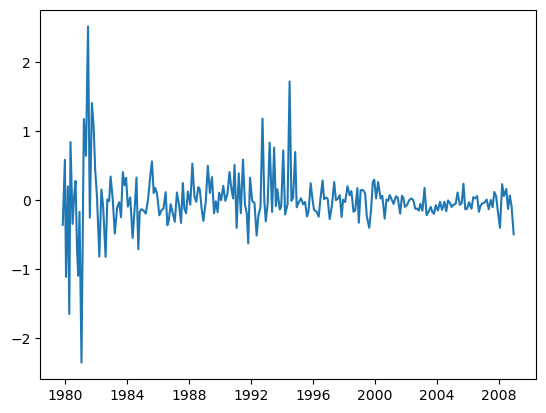

In [29]:
plt.plot(shocks.index, shocks)

However, the FOMC did not meet every month during this period.

For those months that there is no meeting, we simply add a 0 on the shocks series. 

False
GBdate
1979-11-30   -0.358264
1979-12-31    0.000000
1980-01-31   -0.264835
1980-02-29    0.000000
1980-03-31    0.197598
                ...   
2008-08-31    0.000000
2008-09-30    0.066145
2008-10-31   -0.091983
2008-11-30    0.000000
2008-12-31   -0.494399
Freq: M, Length: 350, dtype: float64


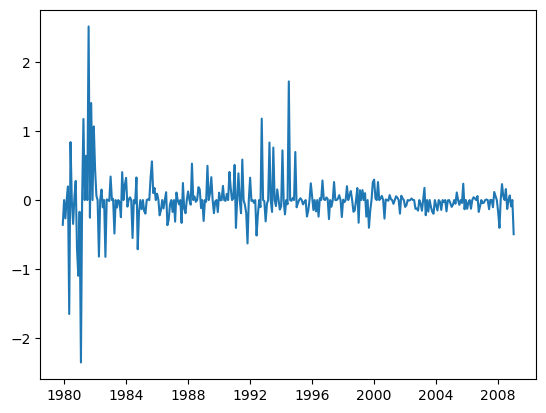

In [34]:
# Check whether there is a shock in each month of the year. That is, check whether the FOMC met in each month
has_shock = shocks.groupby(pd.Grouper(freq='M')).any().all()

# print the result 
print(has_shock) # It will be False!

# Resample the Series by month and fill missing values with 0
shocks = shocks.resample('M').mean().fillna(0)

# .mean() is just used in case that there is a month that for some reason they met more than once. This is extremly
# unlikely, but if somehow it was the case, then we just sum up the shocks in that month.

# print the result
print(shocks)

# Plot the new shocks
plt.plot(shocks.index, shocks)